In [19]:
import pandas as pd
import numpy as np

df_you = pd.read_json("merged_videoId_vs_Alt_id.txt", orient = "index")

In [20]:
df_you.dropna(inplace=True) 

In [21]:
len(df_you)

88822

In [22]:
df_you = df_you[df_you['Number of Dimensions citations']>=1]

In [23]:
len(df_you)

65735

In [24]:
df_you['number_of_views_per_day'] = df_you['views']/df_you['number_of_days']

In [25]:
data = df_you.loc[:,['Number of Dimensions citations',
       'Video mentions', 'cited_by_fbwalls_count', 'cited_by_feeds_count',
       'cited_by_gplus_count', 'cited_by_msm_count', 'cited_by_posts_count',
       'cited_by_rdts_count', 'cited_by_tweeters_count',
       'cited_by_videos_count', 'cited_by_wikipedia_count'] ]
data.fillna(0, inplace=True)

In [26]:
target = np.log(np.add(df_you.number_of_views_per_day, 2))

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
import matplotlib.pyplot  as plt
import matplotlib

In [32]:
traindata,testdata,traintarget,testtarget = train_test_split(data, target, test_size=0.25, random_state=42)

# Linear Regression

In [33]:
reg_all = LinearRegression(normalize=False)
reg_all.fit(traindata, traintarget)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred = reg_all.predict(testdata)
print('Coefficient of Determination R2:',r2_score(testtarget,y_pred))
print('R2 Train Score',reg_all.score(traindata,traintarget))
print('R2 Test Score', reg_all.score(testdata,testtarget))
print('Mean Squared Error:',mean_squared_error(testtarget,y_pred))
print('Mean Absolute Error:',mean_absolute_error(testtarget,y_pred))

Coefficient of Determination R2: 0.03078743305774856
R2 Train Score 0.031328312740290576
R2 Test Score 0.03078743305774856
Mean Squared Error: 3.131664130242229
Mean Absolute Error: 1.3504449951833242


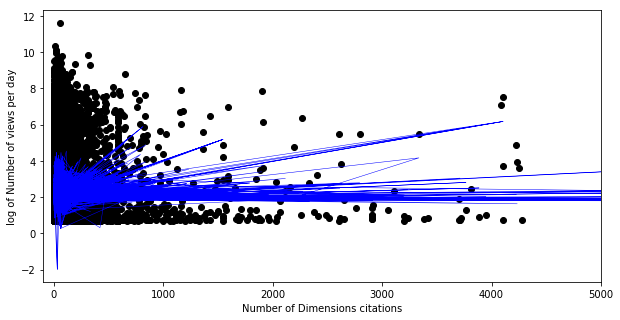

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(testdata['Number of Dimensions citations'], testtarget,  color='black')
plt.plot(testdata['Number of Dimensions citations'], y_pred, color='blue', linewidth=0.5)
plt.xlim(-100,5000)
plt.xlabel("Number of Dimensions citations")
plt.ylabel("log of Number of views per day")
plt.show()

# Ridge Regression 

In [37]:
ridge_regr = linear_model.Ridge(alpha=1)
ridge_model = ridge_regr.fit(traindata,traintarget)
y_pred_ridge = ridge_model.predict(testdata)

In [38]:
print('Coefficient of Determination:',r2_score(testtarget,y_pred_ridge))
print("R2 Score Train(X,y)=",ridge_model.score(traindata,traintarget))
print('Mean Squared Error:',mean_squared_error(testtarget,y_pred_ridge))
print('Mean Absolute Error:',mean_absolute_error(testtarget,y_pred_ridge))
print("Ridge intercept = %.2f"%ridge_model.intercept_)

Coefficient of Determination: 0.030787430977263552
R2 Score Train(X,y)= 0.0313283127402294
Mean Squared Error: 3.131664136964573
Mean Absolute Error: 1.3504450016958738
Ridge intercept = 1.85


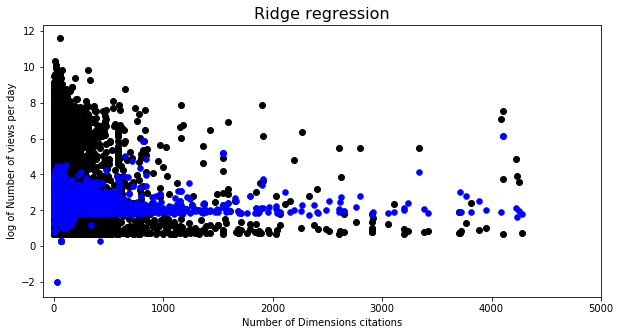

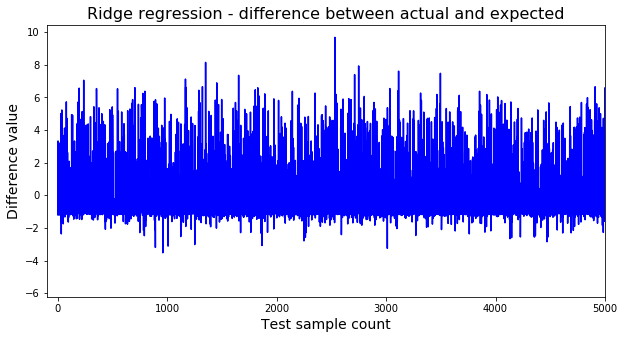

In [40]:
predict_diff=np.subtract(testtarget,y_pred_ridge)
plt.figure(figsize=(10,5))
plt.title('Ridge regression', fontsize=16)
plt.scatter(testdata['Number of Dimensions citations'], testtarget,  color='black')
plt.scatter(testdata['Number of Dimensions citations'], y_pred, color='blue', linewidth=0.5)
plt.xlim(-100,5000)
plt.xlabel("Number of Dimensions citations")
plt.ylabel("log of Number of views per day")
plt.show()

plt.figure(figsize=(10,5))
plt.title('Ridge regression - difference between actual and expected', fontsize=16)
plt.xlabel('Test sample count', fontsize=14)
plt.ylabel('Difference value' , fontsize=14)
plt.xlim(-100,5000)
plt.plot(np.arange(predict_diff.size), 
         predict_diff,
         color='blue')
plt.show()

# Lasso Regression

In [41]:
lasso = Lasso(alpha=0.05, normalize=False)
lasso.fit(traindata,traintarget)
pred_lasso= lasso.predict(testdata)
coeff_used = np.sum(lasso.coef_!=0)


In [42]:
#print("score test=",lasso_reg.score(X_test,y_test))
print('Coefficient of Determination R2:',r2_score(testtarget,pred_lasso))
print("R2 Score Train=",lasso.score(traindata,traintarget))
print('Mean Squared Error:',mean_squared_error(testtarget,pred_lasso))
print('Mean Absolute Error:',mean_absolute_error(testtarget,pred_lasso))

Coefficient of Determination R2: 0.02995917545688831
R2 Score Train= 0.030865337447923188
Mean Squared Error: 3.1343403487599044
Mean Absolute Error: 1.351534138543085


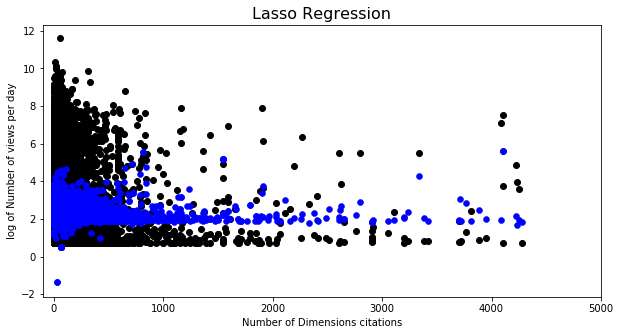

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(testdata['Number of Dimensions citations'], testtarget,  color='black')
plt.scatter(testdata['Number of Dimensions citations'], pred_lasso, color='blue', linewidth=0.5)
plt.xlim(-100,5000)
plt.title("Lasso Regression", fontsize=16)
plt.xlabel("Number of Dimensions citations")
plt.ylabel("log of Number of views per day")
plt.show()

Predicting number views per day of video citing a research paper using regression
Using the altmetric features like dimension citations, number of Facebook, feeds, GooglePlus, total number of posts, Reddits, Twitter, YouTube, Wikipedia mentions, we have predicted number of views per day will a YouTube video will generate if it is posted citing a research paper.
Using those features we have trained model using Linear, Ridge and Lasso regression.
For building model we have considered YouTube videos citing a research paper which has atleast one dimension citation.
And the target variable is logarithmic values of views of videos. The numbers are converted to logarithmic values in order to decrease the range of values.
The results of the trained models are
Model	R2	Mean Square Error	Mean Absolute Error
Linear Regression	0.03	3.13	1.35
Ridge Regression	0.03	3.13	1.35
Lasso Regression	0.03	3.13	1.35
